In [213]:
#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [214]:
#
df = pd.read_csv("cereal.csv",sep=";")

In [190]:
df.head()
#calories
#protein
#fat
#fiber
#carbo
#potass
#vitamins
#shelf
#weight
#cups
#rating

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,String,Categorical,Categorical,Int,Int,Int,Int,Float,Float,Int,Int,Int,Int,Float,Float,Float
1,100% Bran,N,C,70,4,1,130,10,5,6,280,25,3,1,0.33,68.402973
2,100% Natural Bran,Q,C,120,3,5,15,2,8,8,135,0,3,1,1,33.983679
3,All-Bran,K,C,70,4,1,260,9,7,5,320,25,3,1,0.33,59.425505
4,All-Bran with Extra Fiber,K,C,50,4,0,140,14,8,0,330,25,3,1,0.5,93.704912


In [30]:
df.describe()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78
unique,78,8,3,12,7,6,28,14,23,18,37,4,4,8,13,78
top,Frosted Mini-Wheats,K,C,110,3,1,0,0,13,3,90,25,3,1,1,41.015492
freq,1,23,74,29,28,30,9,19,8,13,5,63,36,64,30,1


In [31]:
df.shape

(78, 16)

In [215]:
#
df = df.iloc[1:]
df.drop(["name"],axis=1,inplace=True)

In [33]:
df.head(5)

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
1,N,C,70,4,1,130,10,5,6,280,25,3,1,0.33,68.402973
2,Q,C,120,3,5,15,2,8,8,135,0,3,1,1,33.983679
3,K,C,70,4,1,260,9,7,5,320,25,3,1,0.33,59.425505
4,K,C,50,4,0,140,14,8,0,330,25,3,1,0.5,93.704912
5,R,C,110,2,2,200,1,14,8,-1,25,3,1,0.75,34.384843


In [144]:
df.isna().sum()

mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [216]:
#
columns = df.columns
columns

Index(['mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo',
       'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups', 'rating'],
      dtype='object')

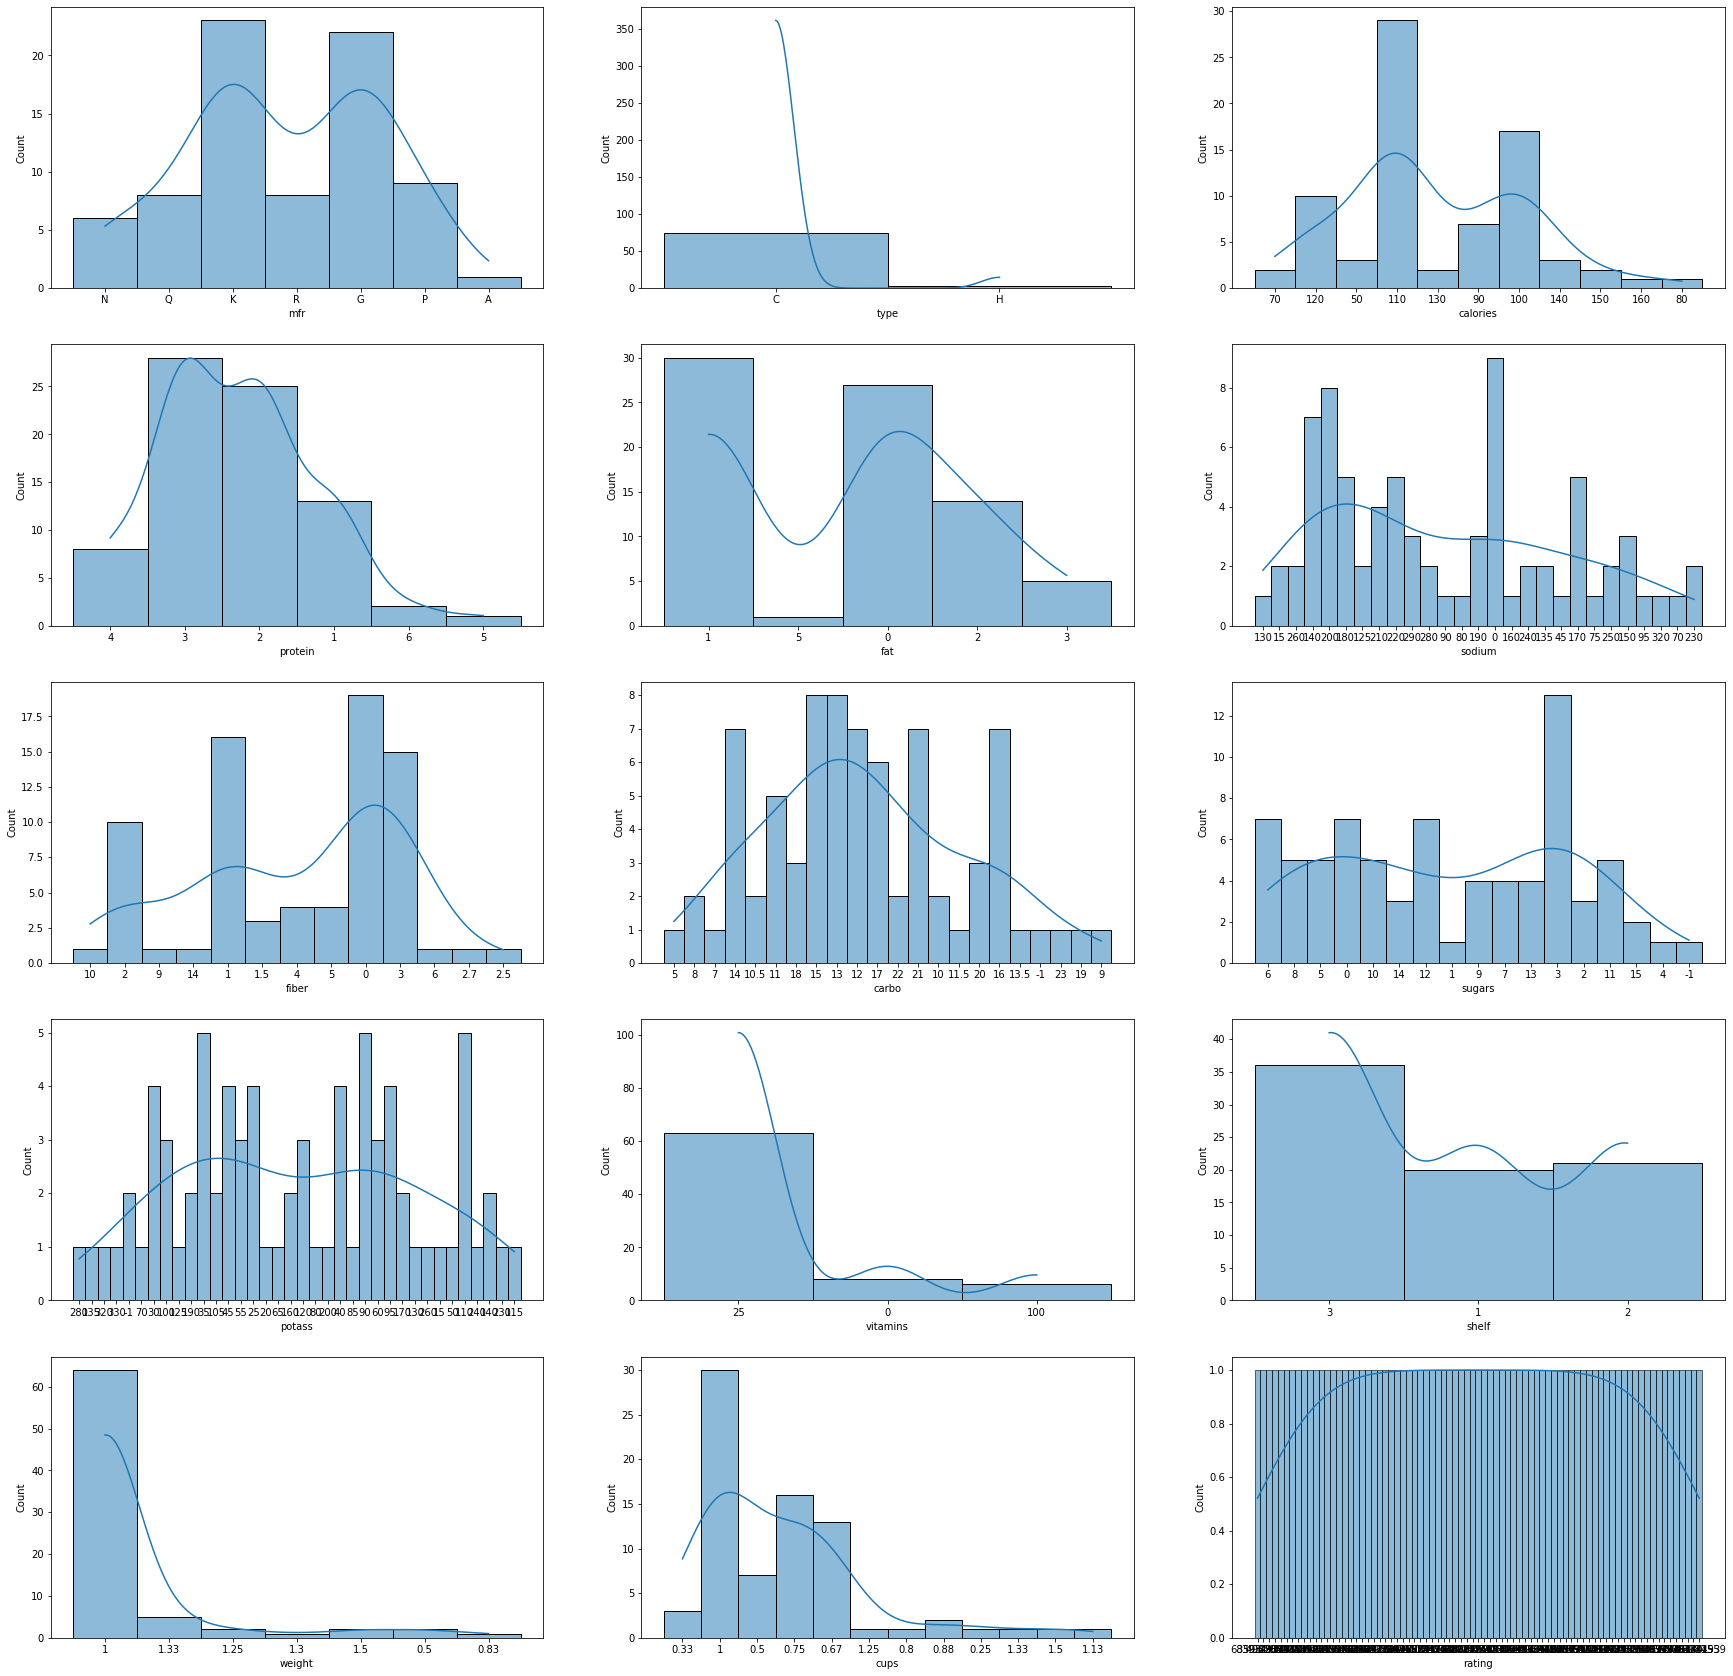

In [36]:
#Visualize the data

plt.figure(figsize=(30,30))
for i in range(15):
    ax = plt.subplot(5,3,i+1)
    sns.histplot(data=df, x=columns[i],kde=True)

C:\Users\bhara\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


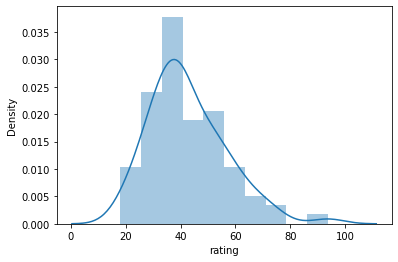

In [37]:
sns.distplot(df["rating"])

In [217]:
#
df = pd.get_dummies(df, columns=['mfr','type'])

In [39]:
df.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,...,rating,mfr_A,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,type_C,type_H
1,70,4,1,130,10,5,6,280,25,3,...,68.402973,0,0,0,1,0,0,0,1,0
2,120,3,5,15,2,8,8,135,0,3,...,33.983679,0,0,0,0,0,1,0,1,0
3,70,4,1,260,9,7,5,320,25,3,...,59.425505,0,0,1,0,0,0,0,1,0
4,50,4,0,140,14,8,0,330,25,3,...,93.704912,0,0,1,0,0,0,0,1,0
5,110,2,2,200,1,14,8,-1,25,3,...,34.384843,0,0,0,0,0,0,1,1,0


In [218]:
#
X = df.drop(["rating","sodium","sugars"],axis=1,inplace=False)
y = pd.DataFrame(df["rating"].apply(lambda x:float(''.join(x.split()))))

In [129]:
import os,sys
from scipy import stats

In [134]:
for i in range(0,df.shape[0]):
    w = y.loc[i][0].split()
#     w=f[i].split()
    l1=w[1:8]
    l2=w[8:15]
    try:
        list1=[float(x) for x in l1]
        list2=[float(x) for x in l2]
    except ValueError:
        print ("error on line",i)
    result=stats.ttest_ind(list1,list2)
    print (result[1])

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [219]:
#
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X[['calories', 'protein', 'fat','fiber', 'carbo',
       'potass', 'vitamins', 'shelf', 'weight', 'cups', 'mfr_A',
       'mfr_G', 'mfr_K', 'mfr_N', 'mfr_P', 'mfr_Q', 'mfr_R', 'type_C',
       'type_H']] = scaler.fit_transform(
    X[['calories', 'protein', 'fat', 'fiber', 'carbo',
       'potass', 'vitamins', 'shelf', 'weight', 'cups','mfr_A',
       'mfr_G', 'mfr_K', 'mfr_N', 'mfr_P', 'mfr_Q', 'mfr_R', 'type_C',
       'type_H']])

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [44]:
X_test.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,...,cups,mfr_A,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,type_C,type_H
32,0.545455,0.0,0.2,0.87500,0.000000,0.666667,0.6250,0.138973,0.25,0.5,...,0.400,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
44,0.454545,0.6,0.2,0.00000,0.000000,0.708333,0.2500,0.290030,0.25,0.5,...,0.600,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
27,0.454545,0.4,0.0,0.00000,0.214286,0.625000,0.5000,0.305136,0.25,0.5,...,0.440,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
75,0.454545,0.4,0.2,0.71875,0.214286,0.750000,0.2500,0.350453,0.25,0.0,...,0.336,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
59,0.636364,0.4,0.2,0.65625,0.357143,0.625000,0.8125,0.728097,0.25,0.5,...,0.400,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [45]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
regression.fit(X_train,y_train)
regression.score(X_test,y_test)

0.9999999999999993

In [46]:
### User Defined Linear Regression

def estimate_coef_multiple_linear_regression(X_train, y_train):
    
    Theta = np.zeros(X_train.shape[1]).reshape(-1,1)

    a = 0.5
    m = X_train.shape[0]

    for i in range(100000):
        h = np.dot(X_train,Theta)
        J = sum((h-y_train)**2)/(2*X_train.shape[0])
        Theta = Theta - (a/m) * np.dot(X_train.transpose(),(h-y_train))
    
    return Theta

In [47]:
y_train = np.array(y_train.astype("float"))
y_test = np.array(y_test.astype("float"))

Theta = estimate_coef_multiple_linear_regression(X_train, y_train)

In [48]:
y_pred = np.dot(X_test,Theta)

In [49]:
def r_squared(y_test, y_pred):
    return 1 - ((np.sum((y_test-y_pred)**2)) / np.sum((y_test - np.mean(y_test))**2))

In [50]:
## R-Square of model trained using user defined Linear Regression Function & User Defined R-Square Function
r_squared(y_test, y_pred)

0.934470997817708

In [51]:
## R-Square of model trained using user defined Linear Regression Function & Sklearn R2_score Function

from sklearn.metrics import r2_score

r2_score(y_test,y_pred)

0.934470997817708

In [52]:
X_test.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,...,cups,mfr_A,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,type_C,type_H
32,0.545455,0.0,0.2,0.87500,0.000000,0.666667,0.6250,0.138973,0.25,0.5,...,0.400,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
44,0.454545,0.6,0.2,0.00000,0.000000,0.708333,0.2500,0.290030,0.25,0.5,...,0.600,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
27,0.454545,0.4,0.0,0.00000,0.214286,0.625000,0.5000,0.305136,0.25,0.5,...,0.440,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
75,0.454545,0.4,0.2,0.71875,0.214286,0.750000,0.2500,0.350453,0.25,0.0,...,0.336,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
59,0.636364,0.4,0.2,0.65625,0.357143,0.625000,0.8125,0.728097,0.25,0.5,...,0.400,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [53]:
df

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,...,rating,mfr_A,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,type_C,type_H
1,70,4,1,130,10,5,6,280,25,3,...,68.402973,0,0,0,1,0,0,0,1,0
2,120,3,5,15,2,8,8,135,0,3,...,33.983679,0,0,0,0,0,1,0,1,0
3,70,4,1,260,9,7,5,320,25,3,...,59.425505,0,0,1,0,0,0,0,1,0
4,50,4,0,140,14,8,0,330,25,3,...,93.704912,0,0,1,0,0,0,0,1,0
5,110,2,2,200,1,14,8,-1,25,3,...,34.384843,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,110,2,1,250,0,21,3,60,25,3,...,39.106174,0,1,0,0,0,0,0,1,0
74,110,1,1,140,0,13,12,25,25,2,...,27.753301,0,1,0,0,0,0,0,1,0
75,100,3,1,230,3,17,3,115,25,1,...,49.787445,0,0,0,0,0,0,1,1,0
76,100,3,1,200,3,17,3,110,25,1,...,51.592193,0,1,0,0,0,0,0,1,0


In [66]:
X = df.drop(["sodium"],axis=1,inplace=False)

In [63]:
Y = X.drop(["sugars"],axis=1,inplace=False)

In [65]:
Y

,calories,protein,fat,fiber,carbo,potass,vitamins,shelf,weight,cups,rating,mfr_A,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,type_C,type_H
1,70,4,1,10,5,280,25,3,1,0.33,68.402973,0,0,0,1,0,0,0,1,0
2,120,3,5,2,8,135,0,3,1,1,33.983679,0,0,0,0,0,1,0,1,0
3,70,4,1,9,7,320,25,3,1,0.33,59.425505,0,0,1,0,0,0,0,1,0
4,50,4,0,14,8,330,25,3,1,0.5,93.704912,0,0,1,0,0,0,0,1,0
5,110,2,2,1,14,-1,25,3,1,0.75,34.384843,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,110,2,1,0,21,60,25,3,1,0.75,39.106174,0,1,0,0,0,0,0,1,0
74,110,1,1,0,13,25,25,2,1,1,27.753301,0,1,0,0,0,0,0,1,0
75,100,3,1,3,17,115,25,1,1,0.67,49.787445,0,0,0,0,0,0,1,1,0
76,100,3,1,3,17,110,25,1,1,1,51.592193,0,1,0,0,0,0,0,1,0


In [69]:
library(modelr)
data.frame(
  R2 = rsquare(df, data = swiss),
  RMSE = rmse(df, data = swiss),
  MAE = mae(df, data = swiss)
)

NameError: name 'library' is not defined

In [73]:
mae = metrics.mean_absolute_error(df,Y)
mse = metrics.mean_squared_error(df, Y)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y,yhat)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

TypeError: Expected sequence or array-like, got estimator LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [221]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

regression = LinearRegression()
regression.fit(X_train,y_train)
regression.score(X_test,y_test)
y_pred = regression.predict(X_test)

In [222]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

mae = mean_absolute_error(y_pred,y_test)
mse = metrics.mean_squared_error(y_pred,y_test)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = r2_score(y_pred,y_test)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 4.99993318258906
MSE: 44.98764692517205
RMSE: 6.7072831254668275
R-Squared: 0.5907477159654251


In [223]:
regression.score(X_test,y_test)

0.6544074703066796

In [224]:
regression.score(X_train,y_train)

0.970660172472408